**GROUP PROJECT - Alzheimer’s Disease Prediction and Brain Region Analysis from MRI Scans**

**Reading Data From the zipped file containing 4 classes**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Class: Mild Dementia
Displaying image: OAS1_0031_MR1_mpr-2_149.jpg


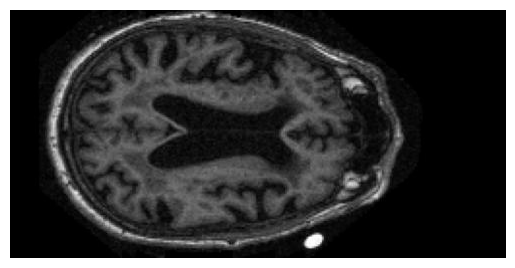

Class: Very mild Dementia
Displaying image: OAS1_0272_MR1_mpr-3_114.jpg


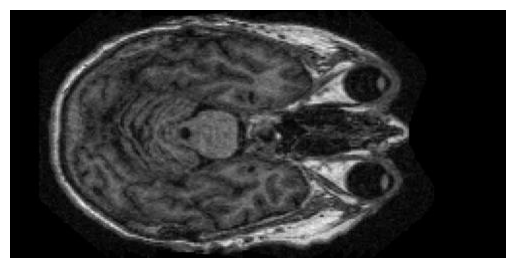

Class: Moderate Dementia
Displaying image: OAS1_0351_MR1_mpr-4_105.jpg


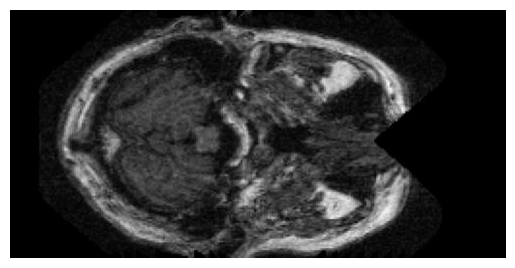

Class: Non Demented
Displaying image: OAS1_0354_MR1_mpr-3_140.jpg


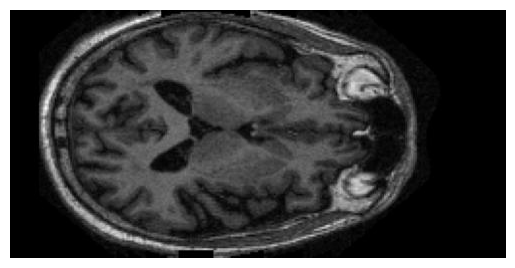

In [ ]:
import zipfile
import os
import shutil
from PIL import Image
import matplotlib.pyplot as plt

# Function to extract, read, and display images from the zipped folder
def extract_and_read_zip(zip_path, extract_to='extracted_data'):
    # Extract the zip file
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

    # List the contents of the extracted folder (the classes)
    classes = os.listdir(extract_to)

    # Loop through each class directory
    for class_name in classes:
        class_path = os.path.join(extract_to, class_name)
        if os.path.isdir(class_path):
            print(f"Class: {class_name}")

            # Loop through all images in the directory
            for file_name in os.listdir(class_path):
                file_path = os.path.join(class_path, file_name)

                # Check if the file is an image
                if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                    print(f"Displaying image: {file_name}")

                    # Open and display the image
                    img = Image.open(file_path)
                    plt.imshow(img)
                    plt.axis('off')  # Hide axis
                    plt.show()

                    # Break after displaying the first image in the class
                    break

                    #To read all images from each class remove break

# Reading our dataset file
zip_path = '/content/drive/MyDrive/Data (2).zip'
extract_and_read_zip(zip_path)




**COUNTING THE NUMBER OF IMAGES IN EACH CLASS FOR FURTHER ANALYSIS**

In [ ]:
import zipfile
import os
from collections import Counter

# Function to extract and count images in each class
def extract_and_count_images(zip_path, extract_to='extracted_data'):
    # Extract the zip file
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

    # List the contents of the extracted folder (the classes)
    classes = os.listdir(extract_to)
    class_counts = Counter()

    # Loop through each class directory
    for class_name in classes:
        class_path = os.path.join(extract_to, class_name)
        if os.path.isdir(class_path):
            print(f"Class: {class_name}")
            # Count all images in the class folder
            image_count = sum(
                1 for file_name in os.listdir(class_path)
                if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))
            )
            class_counts[class_name] = image_count

    # Print the number of images in each class
    for class_name, count in class_counts.items():
        print(f"Class: {class_name}, Number of Images: {count}")

# Path to the zip file
zip_path = '/content/drive/MyDrive/Data (2).zip'

# Extract and count images
extract_and_count_images(zip_path)


Class: Mild Dementia
Class: Very mild Dementia
Class: Moderate Dementia
Class: Non Demented
Class: Mild Dementia, Number of Images: 5002
Class: Very mild Dementia, Number of Images: 13725
Class: Moderate Dementia, Number of Images: 488
Class: Non Demented, Number of Images: 67222


**Problem: Data Imbalance**



## **Balancing the Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Proposed Plan:**

**Drop "Moderate Dementia": Remove this class.**

**Undersample the "Non Demented" class to around 5002 images (closer to the size of the  mild Dementia class).**


**Undersample the "Very mild Dementia" class to around 5002 images (closer to the size of the  mild Dementia class).**



In [ ]:
import zipfile
import os
import shutil
from PIL import Image
import matplotlib.pyplot as plt

# Function to extract, process, and save images from the zipped folder
def extract_and_process_zip(zip_path, extract_to='extracted_data', save_to='/content/drive/MyDrive/processed_data'):
    # Step 1: Extract the zip file
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

    # List the contents of the extracted folder (the classes)
    classes = os.listdir(extract_to)

    # Create a directory to save the processed data
    if not os.path.exists(save_to):
        os.makedirs(save_to)

    # Step 2: Process each class
    for class_name in classes:
        class_path = os.path.join(extract_to, class_name)

        # Remove the Moderate Dementia folder
        if class_name == "Moderate Dementia":
            print(f"Removing folder: {class_name}")
            shutil.rmtree(class_path)
            continue

        # Handle the remaining folders: Mild Dementia, Very Mild Dementia, Non-Demented
        if os.path.isdir(class_path):
            print(f"Processing class: {class_name}")

            # List all image files in the class folder
            images = sorted(os.listdir(class_path))  # Sort to maintain order
            selected_images = images[:5002]  # Take only the first 5002 images
            print(selected_images)

            # Create a directory for the class in the save_to folder
            save_class_path = os.path.join(save_to, class_name)
            if not os.path.exists(save_class_path):
                os.makedirs(save_class_path)

            # Step 3: Copy the selected images to the new folder
            for image_name in selected_images:
                image_path = os.path.join(class_path, image_name)
                if image_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                    # Copy the image to the new folder
                    shutil.copy(image_path, save_class_path)
                    print(f"Copied {image_name} to {save_class_path}")

    print(f"Processing complete. Processed data saved to {save_to}.")

# Path to your dataset zip file
zip_path = '/content/drive/MyDrive/Data (2).zip'

# Call the function to extract, process, and save the images
extract_and_process_zip(zip_path)


Streaming output truncated to the last 5000 lines.
Copied OAS1_0001_MR1_mpr-1_103.jpg to /content/drive/MyDrive/processed_data/Non Demented
Copied OAS1_0001_MR1_mpr-1_104.jpg to /content/drive/MyDrive/processed_data/Non Demented
Copied OAS1_0001_MR1_mpr-1_105.jpg to /content/drive/MyDrive/processed_data/Non Demented
Copied OAS1_0001_MR1_mpr-1_106.jpg to /content/drive/MyDrive/processed_data/Non Demented
Copied OAS1_0001_MR1_mpr-1_107.jpg to /content/drive/MyDrive/processed_data/Non Demented
Copied OAS1_0001_MR1_mpr-1_108.jpg to /content/drive/MyDrive/processed_data/Non Demented
Copied OAS1_0001_MR1_mpr-1_109.jpg to /content/drive/MyDrive/processed_data/Non Demented
Copied OAS1_0001_MR1_mpr-1_110.jpg to /content/drive/MyDrive/processed_data/Non Demented
Copied OAS1_0001_MR1_mpr-1_111.jpg to /content/drive/MyDrive/processed_data/Non Demented
Copied OAS1_0001_MR1_mpr-1_112.jpg to /content/drive/MyDrive/processed_data/Non Demented
Copied OAS1_0001_MR1_mpr-1_113.jpg to /content/drive/MyDriv

**READING THE FINAL BALANCED DATASET**

In [ ]:
import os

# Path to the balanced data folder
balanced_data_path = '/content/drive/MyDrive/processed_data'

# Initialize a dictionary to hold image counts
class_image_counts = {}

# Loop through each class folder
for class_name in os.listdir(balanced_data_path):
    class_path = os.path.join(balanced_data_path, class_name)
    if os.path.isdir(class_path):
        # Count the number of images in the class folder
        image_count = sum(1 for img_file in os.listdir(class_path)
                          if img_file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')))
        class_image_counts[class_name] = image_count

# Print the structure and number of images per class
for class_name, count in class_image_counts.items():
    print(f"Class: {class_name}, Number of Images: {count}")


Class: Very mild Dementia, Number of Images: 5002
Class: Mild Dementia, Number of Images: 5002
Class: Non Demented, Number of Images: 5002


**DATA PREPROCESSING - CREATING 3D VOLUMES AND NORMALIZING**

In [ ]:
import os
import numpy as np
import cv2

def create_image_stacks_for_all_classes(base_folder, output_base_folder, stack_size=61, target_size=(256, 256)):

    # List of classes
    classes = ['Mild Dementia', 'Very mild Dementia', 'Non Demented']

    for class_name in classes:
        image_folder = os.path.join(base_folder, class_name)
        output_folder = os.path.join(output_base_folder, class_name + '_stacked')

        if not os.path.exists(output_folder):
            os.makedirs(output_folder)

        # List and sort image files to maintain the order
        image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]
        image_files.sort()

        # Calculate number of patients (each patient has 61 slices)
        num_patients = len(image_files) // stack_size

        print(f"\nProcessing class: {class_name}")
        print(f"Total images: {len(image_files)}, Total patients: {num_patients}")

        for patient_idx in range(num_patients):
            start_idx = patient_idx * stack_size
            end_idx = start_idx + stack_size

            image_stack = []
            for i in range(start_idx, end_idx):
                image_path = os.path.join(image_folder, image_files[i])

                # Read image as grayscale
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

                # Check if the image was read correctly
                if image is None:
                    print(f"Error reading image: {image_path}")
                    continue  # Skip this image and move on

                # Resize the image to target size
                resized_image = cv2.resize(image, target_size)  # Resize to (256, 256)

                image_stack.append(resized_image)

            # Check if we have the right number of slices for the patient
            if len(image_stack) != stack_size:
                print(f"Skipping patient {patient_idx+1} due to missing or unreadable images.")
                continue

            # Stack the 61 slices into a 3D volume (256x256x61)
            image_stack = np.stack(image_stack, axis=-1)

            # Save the stacked volume as a .npy file
            output_path = os.path.join(output_folder, f"patient_{patient_idx+1}.npy")
            np.save(output_path, image_stack)
            print(f"Created stack for patient {patient_idx+1}, Shape: {image_stack.shape}")

        # Print final shape info for each class
        print(f"Final shape for {class_name}: {target_size + (stack_size,)} per patient")

# Specify the paths
base_folder = '/content/drive/MyDrive/processed_data'  # Folder with the three classes
output_base_folder = '/content/drive/MyDrive/stacked_volumes'  # Folder to save the 3D volumes

# Call the function for all classes
create_image_stacks_for_all_classes(base_folder, output_base_folder)



Processing class: Mild Dementia
Total images: 5002, Total patients: 82
Created stack for patient 1, Shape: (256, 256, 61)
Created stack for patient 2, Shape: (256, 256, 61)
Created stack for patient 3, Shape: (256, 256, 61)
Created stack for patient 4, Shape: (256, 256, 61)
Created stack for patient 5, Shape: (256, 256, 61)
Created stack for patient 6, Shape: (256, 256, 61)
Created stack for patient 7, Shape: (256, 256, 61)
Created stack for patient 8, Shape: (256, 256, 61)
Created stack for patient 9, Shape: (256, 256, 61)
Created stack for patient 10, Shape: (256, 256, 61)
Created stack for patient 11, Shape: (256, 256, 61)
Created stack for patient 12, Shape: (256, 256, 61)
Created stack for patient 13, Shape: (256, 256, 61)
Created stack for patient 14, Shape: (256, 256, 61)
Created stack for patient 15, Shape: (256, 256, 61)
Created stack for patient 16, Shape: (256, 256, 61)
Created stack for patient 17, Shape: (256, 256, 61)
Created stack for patient 18, Shape: (256, 256, 61)
C

In [ ]:
from PIL import Image
import numpy as np
data = np.load('patient_1.npy')

data.shape

(256, 256, 61)

**3D MODEL DEVELOPMENT AND TRAINING.**

**TRAIN-TEST SPLIT**
**(standard train-test split and validates the model using a validation split of the training data,)**

In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Dense, Flatten, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Function to load stacked 3D volumes and labels
def load_stacked_data(stacked_folder, classes, labels):
    data = []
    target_labels = []

    for class_name, label in zip(classes, labels):
        class_folder = os.path.join(stacked_folder, class_name + '_stacked')
        stacked_files = [f for f in os.listdir(class_folder) if f.endswith('.npy')]

        for file in stacked_files:
            file_path = os.path.join(class_folder, file)
            volume = np.load(file_path)  # Load the 3D volume

            # Add channel dimension (for grayscale, it's 1)
            volume = np.expand_dims(volume, axis=-1)

            data.append(volume)
            target_labels.append(label)  # Append corresponding label

    return np.array(data), np.array(target_labels)

# Define class labels: 1 for Alzheimer's, 0 for Non-Alzheimer's
classes = ['Mild Dementia', 'Very mild Dementia', 'Non Demented']
labels = [1, 1, 0]  # Mild/VMD = 1 (Alzheimer's), Non-Demented = 0 (Non-Alzheimer's)

# Load the data
stacked_folder = '/content/drive/MyDrive/stacked_volumes'
X, y = load_stacked_data(stacked_folder, classes, labels)

# Print the shape of the data and the labels
print("Data shape (X):", X.shape)
print("Labels (y):", y.shape)

# Print the first few labels to check
print("First 10 labels:", y[:10])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Print the first few labels from the train and test sets to check the splitting
print("First 10 training labels:", y_train[:10])
print("First 10 test labels:", y_test[:10])

# Rescale MRI images to 64x64 for less memory usage
new_size = (64, 64)

# Function to resize volumes to (64, 64, 61)
def resize_volumes(X):
    resized_volumes = []
    for volume in X:
        # Resize each 3D volume while maintaining the number of slices
        resized_volume = tf.image.resize(volume[..., 0], new_size)  # Resize the spatial dimensions
        # Add the number of slices back and expand dims
        resized_volume = np.expand_dims(resized_volume, axis=-1)  # Add channel dimension
        resized_volumes.append(resized_volume)
    return np.array(resized_volumes)

# Resize the data
X_train_resized = resize_volumes(X_train)
X_test_resized = resize_volumes(X_test)

# Check shapes after resizing
print("X_train_resized shape:", X_train_resized.shape)
print("X_test_resized shape:", X_test_resized.shape)

Data shape (X): (246, 256, 256, 61, 1)
Labels (y): (246,)
First 10 labels: [1 1 1 1 1 1 1 1 1 1]
X_train shape: (196, 256, 256, 61, 1)
y_train shape: (196,)
X_test shape: (50, 256, 256, 61, 1)
y_test shape: (50,)
First 10 training labels: [1 0 1 0 0 1 1 0 1 1]
First 10 test labels: [1 1 0 1 1 0 0 1 1 0]
X_train_resized shape: (196, 64, 64, 61, 1)
X_test_resized shape: (50, 64, 64, 61, 1)


X_train_resized shape: (196, 64, 64, 61, 1)
y_train shape: (196,)
Epoch 1/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 539ms/step - accuracy: 0.6583 - loss: 10.4875 - val_accuracy: 0.3500 - val_loss: 112.9733 - learning_rate: 0.0010
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.6368 - loss: 1.0376 - val_accuracy: 0.4250 - val_loss: 16.5206 - learning_rate: 0.0010
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.7103 - loss: 0.5450 - val_accuracy: 0.5250 - val_loss: 3.6719 - learning_rate: 0.0010
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.6874 - loss: 0.6369 - val_accuracy: 0.4750 - val_loss: 2.2736 - learning_rate: 0.0010
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.7542 - loss: 0.5620 - val_accuracy: 0.4750 - val_loss: 1.2329 - learning_rate: 0.0010
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 220ms/step - accuracy: 0.7096 - loss: 0.6212 - val_accuracy: 0.5500 - val_loss: 0.7983 - learning_rate: 0.0010
Epoch 7/25
20/20 ━━━━

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                 precision    recall  f1-score   support

Non-Alzheimer's       0.00      0.00      0.00        21
    Alzheimer's       0.58      1.00      0.73        29

       accuracy                           0.58        50
      macro avg       0.29      0.50      0.37        50
   weighted avg       0.34      0.58      0.43        50

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step 
AUC-ROC Score: 0.9113


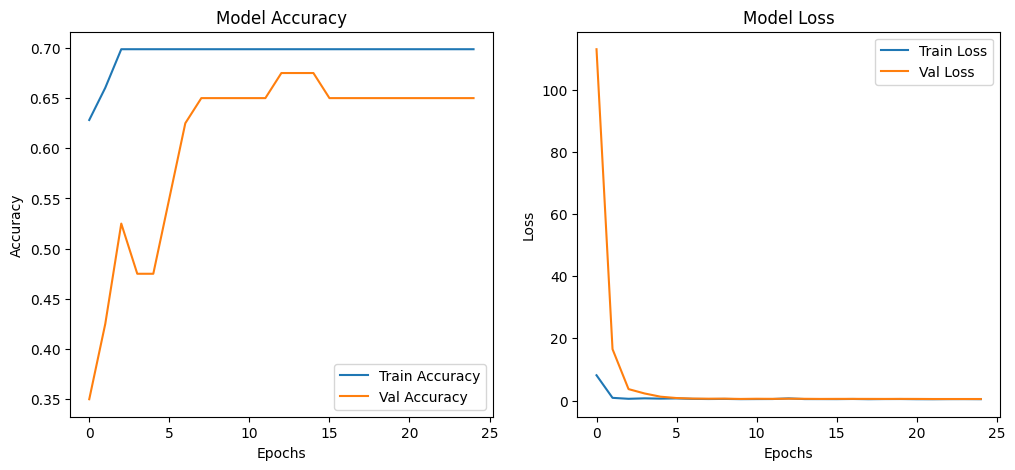

In [ ]:
import numpy as np
import random
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout, BatchNormalization, Input
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt


# Define the optimized 3D CNN model
def build_optimized_3d_cnn(input_shape):
    model = Sequential()

    # Add an Input layer
    model.add(Input(shape=input_shape))

    model.add(Conv3D(16, kernel_size=(3, 3, 3), activation='relu'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model.add(BatchNormalization())

    model.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model.add(BatchNormalization())

    model.add(Flatten())  # Ensure that the output shape is compatible
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification: Alzheimer's (1) or Non-Alzheimer's (0)

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Input shape after resizing (64, 64, 61, 1)
input_shape = (64, 64, 61, 1)

# Build model
model = build_optimized_3d_cnn(input_shape)

# Callbacks: ModelCheckpoint to save the best model, EarlyStopping, and ReduceLROnPlateau
checkpoint = ModelCheckpoint('/content/drive/MyDrive/models/best_model.keras', monitor='val_loss', save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=15, mode='min')  # Increased patience
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)  # Reduce learning rate on plateau

# Train the model with a larger batch size
print("X_train_resized shape:", X_train_resized.shape)
print("y_train shape:", y_train.shape)

# Train the model
history = model.fit(X_train_resized, y_train, validation_split=0.2, epochs=25, batch_size=8,  # Increased batch size
                    callbacks=[checkpoint, early_stopping, reduce_lr])

# Load the best model after training
model.load_weights('/content/drive/MyDrive/models/best_model.keras')

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get predictions and compute additional metrics
y_pred = (model.predict(X_test_resized) > 0.5).astype("int32")

# Generate classification report
print(classification_report(y_test, y_pred, target_names=['Non-Alzheimer\'s', 'Alzheimer\'s']))

# Compute AUC-ROC
y_prob = model.predict(X_test_resized).ravel()  # Predicted probabilities for AUC
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC Score: {auc_score:.4f}")

# Plot training history (Accuracy and Loss)
def plot_training_history(history):
    # Accuracy plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot training history
plot_training_history(history)


BEST MODEL

In [ ]:
# Load the best model after training
model.load_weights('/content/drive/MyDrive/models/best_model.keras')

# Print model summary
print("Best Model Summary:")
model.summary()

# Print optimizer configuration
optimizer_config = model.optimizer.get_config()
print("Optimizer Hyperparameters:")
for key, value in optimizer_config.items():
    print(f"{key}: {value}")



Best Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv3d_2 (Conv3D)                    │ (None, 62, 62, 59, 16)      │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_2 (MaxPooling3D)       │ (None, 31, 31, 29, 16)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 31, 31, 29, 16)      │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_3 (Conv3D)                    │ (None, 29, 29, 27, 32)      │          13,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_3 (MaxPooling3D)       │ (None, 14, 14, 13, 32)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 14, 14, 13, 32)      │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 81536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       5,218,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,698,597 (59.89 MB)

 Trainable params: 5,232,833 (19.96 MB)

 Non-trainable params: 96 (384.00 B)

 Optimizer params: 10,465,668 (39.92 MB)

Optimizer Hyperparameters:
name: adam
learning_rate: 0.0002500000118743628
weight_decay: None
clipnorm: None
global_clipnorm: None
clipvalue: None
use_ema: False
ema_momentum: 0.99
ema_overwrite_frequency: None
loss_scale_factor: None
gradient_accumulation_steps: None
beta_1: 0.9
beta_2: 0.999
epsilon: 1e-07
amsgrad: False


**EVALUATION**

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
AUC-ROC Score: 0.9327


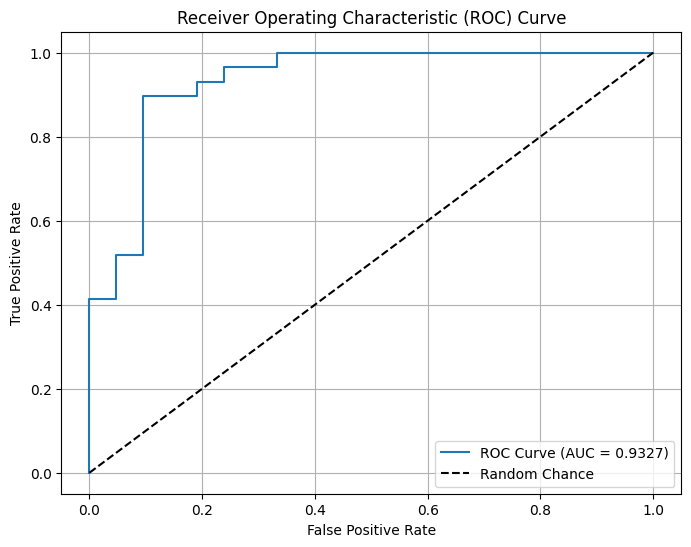

In [ ]:
from sklearn.metrics import roc_curve

# Compute AUC-ROC
y_prob = model.predict(X_test_resized).ravel()  # Predicted probabilities for AUC
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC Score: {auc_score:.4f}")

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



**K-Fold cross-validation in our 3D CNN model**

Fold 1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 472ms/step - accuracy: 0.5693 - loss: 29.4874 - val_accuracy: 0.5800 - val_loss: 484.8096
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - accuracy: 0.7152 - loss: 22.2115 - val_accuracy: 0.5800 - val_loss: 78.9739
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 218ms/step - accuracy: 0.6973 - loss: 5.1337 - val_accuracy: 0.5800 - val_loss: 74.5772
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 222ms/step - accuracy: 0.8632 - loss: 0.3480 - val_accuracy: 0.5800 - val_loss: 32.7529
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 226ms/step - accuracy: 0.8607 - loss: 0.2771 - val_accuracy: 0.6000 - val_loss: 9.4101
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 169ms/step - accuracy: 0.8610 - loss: 0.2101 - val_accuracy: 0.6200 - val_loss: 2.6114
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 245ms/step - accuracy: 0.9075 - loss: 0.1774 - val_accuracy: 0.8200 - val_loss: 0.6721
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 234ms/step - accuracy: 0.9064 - loss: 0.3291 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 441ms/step - accuracy: 0.5797 - loss: 33.1040 - val_accuracy: 0.5918 - val_loss: 45.6394
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - accuracy: 0.7640 - loss: 6.7445 - val_accuracy: 0.7551 - val_loss: 31.6043
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.9083 - loss: 1.1700 - val_accuracy: 0.4082 - val_loss: 48.8208
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 156ms/step - accuracy: 0.8572 - loss: 1.1845 - val_accuracy: 0.7347 - val_loss: 5.2971
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 254ms/step - accuracy: 0.8462 - loss: 1.4470 - val_accuracy: 0.8980 - val_loss: 0.5137
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9210 - loss: 0.3339 - val_accuracy: 0.6735 - val_loss: 2.4087
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9377 - loss: 0.2522 - val_accuracy: 0.6327 - val_loss: 3.2142
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - accuracy: 0.9650 - loss: 0.2442 - val_accuracy: 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 393ms/step - accuracy: 0.5627 - loss: 37.1208 - val_accuracy: 0.2653 - val_loss: 940.6573
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 151ms/step - accuracy: 0.7643 - loss: 13.1342 - val_accuracy: 0.2653 - val_loss: 794.5045
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 189ms/step - accuracy: 0.8877 - loss: 1.9553 - val_accuracy: 0.2653 - val_loss: 314.6767
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 271ms/step - accuracy: 0.8264 - loss: 2.1553 - val_accuracy: 0.2653 - val_loss: 233.3122
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 153ms/step - accuracy: 0.8978 - loss: 1.8787 - val_accuracy: 0.5918 - val_loss: 15.4817
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 264ms/step - accuracy: 0.9038 - loss: 1.1633 - val_accuracy: 0.9388 - val_loss: 0.6065
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9361 - loss: 0.4279 - val_accuracy: 0.6122 - val_loss: 11.1449
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9279 - loss: 0.1409 - val_

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 418ms/step
Accuracy for fold 3: 0.9795918367346939
ROC AUC for fold 3: 1.0
Fold 4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 325ms/step - accuracy: 0.6215 - loss: 21.2180 - val_accuracy: 0.6735 - val_loss: 133.6163
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 171ms/step - accuracy: 0.7740 - loss: 3.9274 - val_accuracy: 0.6735 - val_loss: 121.6440
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 353ms/step - accuracy: 0.7752 - loss: 4.8826 - val_accuracy: 0.6735 - val_loss: 35.3595
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 371ms/step - accuracy: 0.8933 - loss: 1.3865 - val_accuracy: 0.9592 - val_loss: 0.2984
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 169ms/step - accuracy: 0.9387 - loss: 0.3165 - val_accuracy: 0.9592 - val_loss: 0.2444
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 428ms/step - accuracy: 0.9474 - loss: 0.1431 - val_accuracy: 1.0000 - val_loss: 0.0139
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - accuracy: 0.9584 - loss: 0.1175 - val_accuracy: 0.9796 - val_loss: 0.0274
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9501 - loss: 0.0936 - val_acc

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 371ms/step - accuracy: 0.6434 - loss: 16.1562 - val_accuracy: 0.6327 - val_loss: 57.5895
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 274ms/step - accuracy: 0.7059 - loss: 4.5720 - val_accuracy: 0.6735 - val_loss: 29.0089
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 367ms/step - accuracy: 0.7452 - loss: 1.3567 - val_accuracy: 0.6531 - val_loss: 4.2565
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step - accuracy: 0.7210 - loss: 0.4186 - val_accuracy: 0.7347 - val_loss: 0.6806
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 185ms/step - accuracy: 0.7685 - loss: 0.4156 - val_accuracy: 0.7347 - val_loss: 0.6528
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 253ms/step - accuracy: 0.7859 - loss: 0.4706 - val_accuracy: 0.7755 - val_loss: 0.3613
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 355ms/step - accuracy: 0.7999 - loss: 0.3329 - val_accuracy: 0.8571 - val_loss: 0.3557
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.8473 - loss: 0.3029 - val_accurac

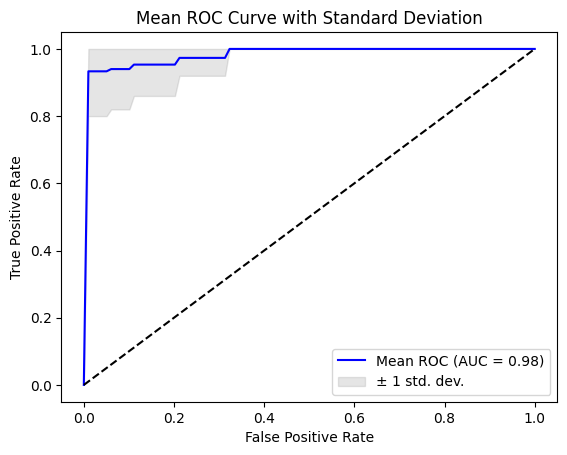

Mean Accuracy: 0.9511020408163265
Standard Deviation of Accuracy: 0.0781162644428949
Mean ROC AUC: 0.9808754208754209
Standard Deviation of ROC AUC: 0.028771929824561403


In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Dense, Flatten, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
from numpy import interp  # Replaced scipy.interp with numpy.interp

# Function to load stacked 3D volumes and labels
def load_stacked_data(stacked_folder, classes, labels):
    data = []
    target_labels = []

    for class_name, label in zip(classes, labels):
        class_folder = os.path.join(stacked_folder, class_name + '_stacked')
        stacked_files = [f for f in os.listdir(class_folder) if f.endswith('.npy')]

        for file in stacked_files:
            file_path = os.path.join(class_folder, file)
            volume = np.load(file_path)  # Load the 3D volume

            # Add channel dimension (for grayscale, it's 1)
            volume = np.expand_dims(volume, axis=-1)

            data.append(volume)
            target_labels.append(label)  # Append corresponding label

    return np.array(data), np.array(target_labels)

# Define class labels: 1 for Alzheimer's, 0 for Non-Alzheimer's
classes = ['Mild Dementia', 'Very mild Dementia', 'Non Demented']
labels = [1, 1, 0]  # Mild/VMD = 1 (Alzheimer's), Non-Demented = 0 (Non-Alzheimer's)

# Load the data
stacked_folder = '/content/drive/MyDrive/stacked_volumes'
X, y = load_stacked_data(stacked_folder, classes, labels)

# Function to resize volumes to (64, 64, 61)
def resize_volumes(X, new_size=(64, 64)):
    resized_volumes = []
    for volume in X:
        # Resize each 3D volume while maintaining the number of slices
        resized_volume = tf.image.resize(volume[..., 0], new_size)  # Resize the spatial dimensions
        # Add the number of slices back and expand dims
        resized_volume = np.expand_dims(resized_volume, axis=-1)  # Add channel dimension
        resized_volumes.append(resized_volume)
    return np.array(resized_volumes)

# Resize the data
X_resized = resize_volumes(X)

# Define a function to build the 3D CNN model
def build_model(input_shape):
    model = Sequential()
    model.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model.add(BatchNormalization())

    model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
roc_aucs = []
accuracy_scores = []
mean_fpr = np.linspace(0, 1, 100)  # For averaging ROC curves

tprs = []  # True positive rates across folds

# Perform k-fold cross-validation
for train_index, val_index in kf.split(X_resized):
    print(f'Fold {fold_no}')

    # Split the data into training and validation sets for the current fold
    X_train, X_val = X_resized[train_index], X_resized[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Build the model
    model = build_model(input_shape=X_train.shape[1:])

   # Define callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(f'best_model_fold_{fold_no}.keras', save_best_only=True)  # Changed to .keras


    # Train the model
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, batch_size=8,
              callbacks=[early_stopping, model_checkpoint], verbose=1)

    # Predict probabilities and classes on the validation set
    y_val_pred_prob = model.predict(X_val).ravel()  # Probabilities for ROC AUC
    y_val_pred_class = (y_val_pred_prob > 0.5).astype(int)  # Convert probabilities to binary class labels

    # Calculate accuracy for the fold
    accuracy = accuracy_score(y_val, y_val_pred_class)
    accuracy_scores.append(accuracy)
    print(f"Accuracy for fold {fold_no}: {accuracy}")

    # Calculate ROC AUC for the fold
    roc_auc = roc_auc_score(y_val, y_val_pred_prob)
    roc_aucs.append(roc_auc)
    print(f"ROC AUC for fold {fold_no}: {roc_auc}")

    # Compute ROC curve for the fold
    fpr, tpr, _ = roc_curve(y_val, y_val_pred_prob)
    tprs.append(interp(mean_fpr, fpr, tpr))  # Interpolate the TPR for the mean FPR
    tprs[-1][0] = 0.0  # Ensure the curve starts at 0

    fold_no += 1

# Calculate the mean accuracy and its standard deviation
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

# Calculate the mean TPR and the standard deviation across all folds
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0  # Ensure it ends at 1

mean_auc = auc(mean_fpr, mean_tpr)  # Calculate the mean AUC
std_auc = np.std(roc_aucs)

# Plot the mean ROC curve
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})')
plt.fill_between(mean_fpr, np.maximum(mean_tpr - np.std(tprs, axis=0), 0),
                 np.minimum(mean_tpr + np.std(tprs, axis=0), 1), color='grey', alpha=0.2, label='± 1 std. dev.')

# Plot diagonal for reference
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean ROC Curve with Standard Deviation')
plt.legend(loc='best')
plt.show()

# Print final results
print(f'Mean Accuracy: {mean_accuracy}')
print(f'Standard Deviation of Accuracy: {std_accuracy}')
print(f'Mean ROC AUC: {mean_auc}')
print(f'Standard Deviation of ROC AUC: {std_auc}')


## **Brain Region Analysis**




# **Visualize Grad-CAM Heatmap on MRI Slices**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import cv2

# Load the best model
model = tf.keras.models.load_model('/content/drive/MyDrive/models/best_model.keras')

# Print model summary to check input shapes
model.summary()

# Load and preprocess the 2D MRI image
image_path = '/content/drive/MyDrive/processed_data/Mild Dementia/OAS1_0028_MR1_mpr-1_100.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
resized_img = cv2.resize(img, (64, 64))  # Resize to match model input (64x64)

# Convert the image to a 5D tensor with shape (1, depth, height, width, channels)
# Here we simulate depth by stacking the resized image 7 times
input_image = np.stack([resized_img] * 7, axis=0)  # Shape becomes (7, 64, 64)
input_image = np.expand_dims(input_image, axis=-1)  # Add channel dimension -> (7, 64, 64, 1)
input_image = np.expand_dims(input_image, axis=0)  # Add batch dimension -> (1, 7, 64, 64, 1)

# Print input shape to verify
print("Input shape for the model:", input_image.shape)

# Call the model with an example input (this step is needed to initialize layers)
try:
    _ = model.predict(input_image)
    print("Model prediction successful.")
except Exception as e:
    print("Error during model prediction:", str(e))

# Create a Grad-CAM model to output both the conv3d_3 layer and the model's final output
try:
    grad_model = Model(inputs=model.input, outputs=[model.get_layer('conv3d_3').output, model.output])
except Exception as e:
    print("Error while creating Grad-CAM model:", str(e))

# Function to compute Grad-CAM heatmap
def compute_gradcam(input_image, class_idx=0):
    # Track gradients with respect to the model's predictions
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(input_image)
        loss = predictions[:, class_idx]  # Class of interest (e.g., 0 for Alzheimer's class)

    # Compute gradients of the loss with respect to the convolutional outputs
    grads = tape.gradient(loss, conv_outputs)

    # Global average pooling on gradients (importance of each feature map)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2, 3))

    # Multiply the feature maps by the pooled gradients
    conv_outputs = conv_outputs[0]  # Removing batch dimension
    for i in range(conv_outputs.shape[-1]):
        conv_outputs[:, :, :, i] *= pooled_grads[i]

    # Generate the heatmap by averaging the weighted feature maps
    heatmap = tf.reduce_mean(conv_outputs, axis=-1).numpy()

    # Normalize heatmap to values between 0 and 1
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap) if np.max(heatmap) != 0 else 1

    return heatmap, predictions

# Function to overlay Grad-CAM heatmap on the original MRI slices
def overlay_heatmap_on_slices(heatmap, original_slice):
    # Resize the heatmap to match the original slice size (64x64)
    heatmap_resized = cv2.resize(heatmap, (64, 64))

    # Normalize original slice for visualization (0-255 range)
    slice_normalized = cv2.normalize(original_slice, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Convert the slice to 3 channels for colorization
    slice_color = cv2.cvtColor(slice_normalized, cv2.COLOR_GRAY2RGB)

    # Apply color map (JET) to the heatmap
    heatmap_color = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)

    # Overlay heatmap onto the original slice with some transparency
    overlayed_img = cv2.addWeighted(slice_color, 0.6, heatmap_color, 0.4, 0)

    return overlayed_img

# Compute Grad-CAM heatmap
heatmap = None
predictions = None  # Initialize predictions to avoid NameError
try:
    heatmap, predictions = compute_gradcam(input_image)
except Exception as e:
    print("Error while computing Grad-CAM:", str(e))

# Check if predictions were successfully made before printing
if predictions is not None:
    print(f'Predicted class: {np.argmax(predictions)}')

    # Overlay heatmap on the original image
    overlayed_image = overlay_heatmap_on_slices(heatmap, resized_img)

    # Display the results
    plt.imshow(overlayed_image)
    plt.title(f"Grad-CAM Overlay - Predicted Class: {np.argmax(predictions)}")
    plt.axis('off')
    plt.show()
else:
    print("Predictions could not be computed.")


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv3d_2 (Conv3D)                    │ (None, 62, 62, 59, 16)      │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_2 (MaxPooling3D)       │ (None, 31, 31, 29, 16)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 31, 31, 29, 16)      │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_3 (Conv3D)                    │ (None, 29, 29, 27, 32)      │          13,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_3 (MaxPooling3D)       │ (None, 14, 14, 13, 32)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 14, 14, 13, 32)      │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 81536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       5,218,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,698,597 (59.89 MB)

 Trainable params: 5,232,833 (19.96 MB)

 Non-trainable params: 96 (384.00 B)

 Optimizer params: 10,465,668 (39.92 MB)

Input shape for the model: (1, 7, 64, 64, 1)
Error during model prediction: Exception encountered when calling Conv3D.call().

Negative dimension size caused by subtracting 3 from 2 for '{{node sequential_1_1/conv3d_3_1/convolution}} = Conv3D[T=DT_FLOAT, data_format="NDHWC", dilations=[1, 1, 1, 1, 1], padding="VALID", strides=[1, 1, 1, 1, 1]](sequential_1_1/batch_normalization_2_1/batchnorm/add_1, sequential_1_1/conv3d_3_1/convolution/ReadVariableOp)' with input shapes: [1,2,31,31,16], [3,3,3,16,32].

Arguments received by Conv3D.call():
  • inputs=tf.Tensor(shape=(1, 2, 31, 31, 16), dtype=float32)
Error while creating Grad-CAM model: The layer sequential_1 has never been called and thus has no defined input.
Error while computing Grad-CAM: name 'grad_model' is not defined
Predictions could not be computed.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load pre-trained model (VGG16)
model = VGG16(weights='imagenet')

# Load an example image
img_path = '/content/drive/MyDrive/processed_data/Non Demented/OAS1_0001_MR1_mpr-1_100.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
def get_gradcam_heatmap(model, img_array, layer_name, pred_index=None):
    # Get model's prediction on the image
    grad_model = tf.keras.models.Model([model.inputs],
                                       [model.get_layer(layer_name).output, model.output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_output = predictions[:, pred_index]

    # Calculate gradients of the class output with respect to the feature maps
    grads = tape.gradient(class_output, conv_outputs)

    # Calculate channel-wise mean of the gradients (global average pooling)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each feature map by its corresponding pooled gradient
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Apply ReLU to only keep positive values
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

    return heatmap.numpy()


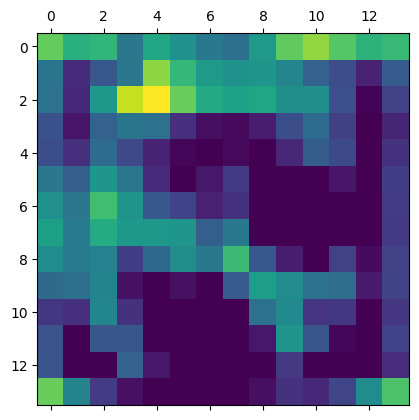

In [ ]:
# Specify the layer to visualize (e.g., 'block5_conv3' in VGG16)
heatmap = get_gradcam_heatmap(model, x, 'block5_conv3')

# Display heatmap
plt.matshow(heatmap)
plt.show()


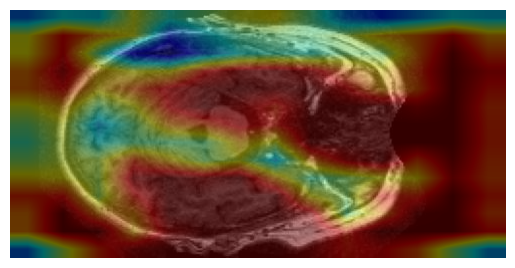

In [ ]:
def overlay_heatmap(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    superimposed_img = cv2.addWeighted(img, 1 - alpha, heatmap, alpha, 0)
    return superimposed_img

superimposed_img = overlay_heatmap(img_path, heatmap)
plt.imshow(superimposed_img)
plt.axis('off')
plt.show()
